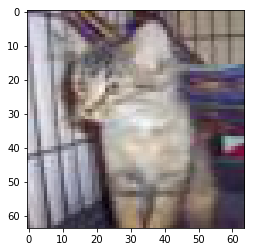

torch.Size([3, 64, 64])
开始


In [1]:
import torch
import h5py
import torchvision
import numpy as np
import time
import os
from PIL import Image
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
transform = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor()
    ]
)
def showTorchImage(image):
    mode = transforms.ToPILImage()(image)
    plt.imshow(mode)
    plt.show()
path = os.path.join('./restrue7/train/cat.0' + '.jpg' )
fopen = Image.open(path)
data = transform(fopen)
showTorchImage(data)
print(data.size())
image = data.view(1,3,64,64).cuda()
print('开始')
st = time.time()

In [2]:
for i in range(1,11911):
    path = os.path.join('./restrue7/train/cat.' + str(i) + '.jpg' )
    fopen = Image.open(path)
    data = transform(fopen)
    data = data.view(1,3,64,64).cuda()
    image = torch.cat((image,data),0)
    if i % 1000 == 0:
        print('进行'+str(i)+'次')

进行1000次
进行2000次
进行3000次
进行4000次
进行5000次
进行6000次
进行7000次
进行8000次
进行9000次
进行10000次
进行11000次


In [3]:
for i in range(0,11911):
    path = os.path.join('./restrue7/train/dog.' + str(i) + '.jpg' )
    fopen = Image.open(path)
    data = transform(fopen)
    data = data.view(1,3,64,64).cuda()
    image = torch.cat((image,data),0)
    if i % 1000 == 0:
        print('进行'+str(i)+'次')

进行0次
进行1000次
进行2000次
进行3000次
进行4000次
进行5000次
进行6000次
进行7000次
进行8000次
进行9000次
进行10000次
进行11000次


In [4]:
print(time.time()-st)

303.22092461586


In [5]:
print(image.size())

torch.Size([23822, 3, 64, 64])


In [6]:
train_y1=torch.zeros(11911)
train_y2=torch.ones(11911)
train_y=torch.cat((train_y1,train_y2),0)
print(train_y.size(),image.size(),train_y)

torch.Size([23822]) torch.Size([23822, 3, 64, 64]) tensor([0., 0., 0.,  ..., 1., 1., 1.])


In [7]:
import h5py
f=h5py.File('train_res_true7_dataset.h5',"w")
dset1=f.create_dataset('train_y',data=train_y)
dset2=f.create_dataset('train_x',data=image.cpu())
print(dset1.shape)
print(dset2.shape)
f.close()

(23822,)
(23822, 3, 64, 64)


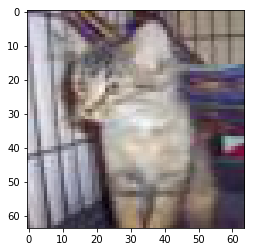

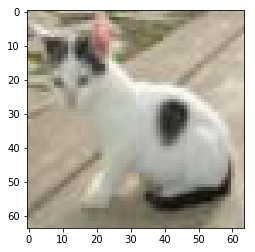

In [8]:
showTorchImage(image[0].cpu())
showTorchImage(image[1].cpu())

(23822, 3, 64, 64) (23822,)


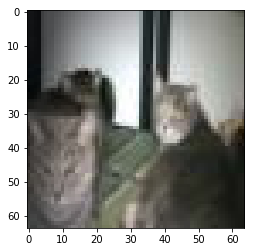

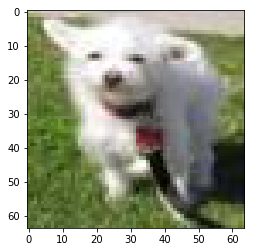

0.0
1.0


In [9]:
test_dataset=h5py.File('train_res_true7_dataset.h5','r')
test_x=test_dataset['train_x'][:]
test_y=test_dataset['train_y'][:]
print(test_x.shape,test_y.shape)
test_x=torch.FloatTensor(test_x)
showTorchImage(test_x[11910])
showTorchImage(test_x[11910+11911])
print(test_y[11910])
print(test_y[11910+11911])

In [10]:
test_dataset.close()